In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('weather.csv')
seq = data.iloc[:,:].values
print(seq)

[[ 8.  24.3  0.   3.4  6.3]
 [14.  26.9  3.6  4.4  9.7]
 [13.7 23.4  3.6  5.8  3.3]
 ...
 [12.5 19.9  0.   8.4  5.3]
 [12.5 26.9  0.   5.   7.1]
 [12.3 30.2  0.   6.  12.6]]


In [3]:
look_back = 2
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)
 
scaler = MinMaxScaler(feature_range=(-1, 1))
seq_scaled = scaler.fit_transform(seq)

seq_train = seq_scaled[:300,:]
seq_test = seq_scaled[300:,:]
X_train,Y_train= create_dataset(seq_train,look_back)
X_test,Y_test= create_dataset(seq_test,look_back)
print(X_train)
print(Y_train)

[[[ 0.01526718  0.18439716 -1.         -0.52941176 -0.07352941]
  [ 0.47328244  0.36879433 -0.81909548 -0.38235294  0.42647059]]

 [[ 0.47328244  0.36879433 -0.81909548 -0.38235294  0.42647059]
  [ 0.45038168  0.12056738 -0.81909548 -0.17647059 -0.51470588]]

 [[ 0.45038168  0.12056738 -0.81909548 -0.17647059 -0.51470588]
  [ 0.41984733 -0.43971631  1.          0.02941176  0.33823529]]

 ...

 [[-0.41221374 -0.53900709 -1.         -0.58823529 -0.73529412]
  [-0.64122137 -0.67375887 -1.         -0.64705882  0.02941176]]

 [[-0.64122137 -0.67375887 -1.         -0.64705882  0.02941176]
  [-0.41984733 -0.71631206 -1.         -0.23529412  0.39705882]]

 [[-0.41984733 -0.71631206 -1.         -0.23529412  0.39705882]
  [-0.8778626  -0.5177305  -1.         -0.64705882  0.52941176]]]
[[ 0.45038168  0.12056738 -0.81909548 -0.17647059 -0.51470588]
 [ 0.41984733 -0.43971631  1.          0.02941176  0.33823529]
 [-0.01526718 -0.39716312 -0.85929648 -0.20588235  0.55882353]
 ...
 [-0.41984733 -0.716

In [6]:
from tensorflow.keras.optimizers import RMSprop
model = keras.Sequential()
model.add(layers.SimpleRNN(50, input_shape=(look_back,5)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(5))
opt = RMSprop(learning_rate=0.0001, momentum=0.9, decay=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)
model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
5/5 [==============================] - 4s 12ms/step - loss: 0.4905
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 0.3245
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1936
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1286
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1176
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1143
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1142
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1159
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1116
Epoch 10/100
5/5 [==============================] - ETA: 0s - loss: 0.113 - 0s 4ms/step - loss: 0.1038
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1050
Epoch 12/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1038
Epoch 13/100
5/5 [==================

[[11.593738   25.010433    1.3453007   6.121853    8.2814865 ]
 [13.267316   23.39672     6.0909076   4.545157    6.6161036 ]
 [ 5.0702424  19.805975   10.652151    5.1766934  11.558025  ]
 ...
 [ 0.36055213 13.014242    0.11281542  1.6414083   6.5146403 ]
 [-0.51357913 12.793706   -0.5455972   2.9776769   8.3026085 ]
 [-0.23878019 15.880826   -1.2956932   2.9651616   8.108823  ]]


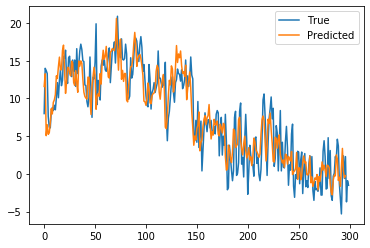

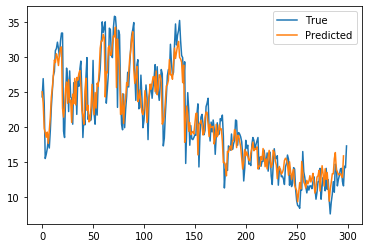

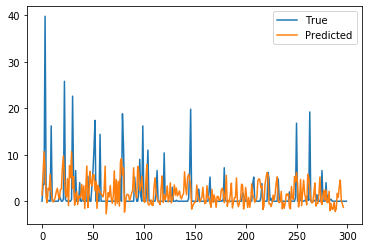

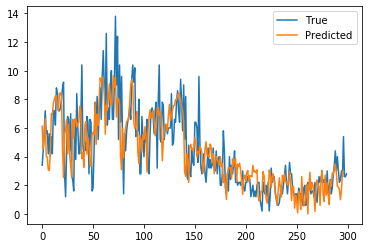

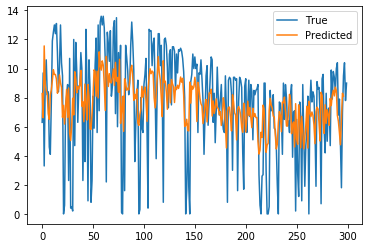

In [7]:
seq_train_pred_scaled = model.predict(X_train)
seq_train_pred = scaler.inverse_transform(seq_train_pred_scaled)
X_train_org = scaler.inverse_transform(seq_train)
print(seq_train_pred)
for i in range(5):
  plt.plot(X_train_org[:,i],label='True')
  plt.plot(seq_train_pred[:,i],label='Predicted')
  plt.legend()
  plt.show()

In [ ]:
seq_test_pred_scaled = model.predict(X_train)
seq_test_pred = scaler.inverse_transform(seq_test_pred_scaled)
X_test_org = scaler.inverse_transform(seq_train)
print(seq_pred)
for i in range(5):
  plt.plot(X_test_org[:,i],label='True')
  plt.plot(seq_test_pred[:,i],label='Predicted')
  plt.legend()
  plt.show()